In [ ]:
import yaml
from rl_games.torch_runner import Runner

## walker_envpool config:
walker_config = {'params': {'algo': {'name': 'a2c_continuous'},
  'config': {'bound_loss_type': 'regularisation',
   'bounds_loss_coef': 0.0005,
   'clip_value': True,
   'critic_coef': 4,
   'e_clip': 0.2,
   'entropy_coef': 0.0,
   'env_config': {'env_name': 'Walker2d-v4', 'seed': 5},
   'env_name': 'envpool',
   'gamma': 0.99,
   'grad_norm': 1.0,
   'horizon_length': 64,
   'kl_threshold': 0.008,
   'learning_rate': '3e-4',
   'lr_schedule': 'adaptive',
   'max_epochs': 5000,
   'mini_epochs': 5,
   'minibatch_size': 2048,
   'name': 'Walker2d-v4',
   'normalize_advantage': True,
   'normalize_input': True,
   'normalize_value': True,
   'num_actors': 64,
   'player': {'render': True},
   'ppo': True,
   'reward_shaper': {'scale_value': 0.1},
   'schedule_type': 'standard',
   'score_to_win': 20000,
   'tau': 0.95,
   'truncate_grads': True,
   'use_smooth_clamp': True,
   'value_bootstrap': True},
  'model': {'name': 'continuous_a2c_logstd'},
  'network': {'mlp': {'activation': 'elu',
    'initializer': {'name': 'default'},
    'units': [256, 128, 64]},
   'name': 'actor_critic',
   'separate': False,
   'space': {'continuous': {'fixed_sigma': True,
     'mu_activation': 'None',
     'mu_init': {'name': 'default'},
     'sigma_activation': 'None',
     'sigma_init': {'name': 'const_initializer', 'val': 0}}}},
  'seed': 5}}


config = walker_config
config['params']['config']['full_experiment_name'] = 'Walker2d_mujoco'
config['params']['config']['max_epochs'] = 500
config['params']['config']['horizon_length'] = 512
config['params']['config']['num_actors'] = 8
config['params']['config']['minibatch_size'] = 1024

runner = Runner()
runner.load(config)
runner.run({
    'train': True,
})


In [2]:
import yaml
from rl_games.torch_runner import Runner

runner=Runner()
## config from the openai gym mujoco (should have the same network and normalization) to render result:

player_walker_config = {'params': {'algo': {'name': 'a2c_continuous'},
  'config': {'bounds_loss_coef': 0.0,
   'clip_value': False,
   'critic_coef': 1,
   'e_clip': 0.2,
   'entropy_coef': 0.0,
   'env_config': {'name': 'Walker2d-v3', 'seed': 5},
   'env_name': 'openai_gym',
   'gamma': 0.995,
   'grad_norm': 0.5,
   'horizon_length': 128,
   'kl_threshold': 0.008,
   'learning_rate': '3e-4',
   'lr_schedule': 'adaptive',
   'max_epochs': 5000,
   'mini_epochs': 4,
   'minibatch_size': 512,
   'name': 'Walker2d-v3',
   'normalize_advantage': True,
   'normalize_input': True,
   'normalize_value': True,
   'num_actors': 16,
   'player': {'render': True},
   'ppo': True,
   'reward_shaper': {'scale_value': 0.1},
   'schedule_type': 'standard',
   'score_to_win': 10000,
   'tau': 0.95,
   'truncate_grads': True,
   'value_bootstrap': True},
  'model': {'name': 'continuous_a2c_logstd'},
  'network': {'mlp': {'activation': 'elu',
    'initializer': {'name': 'default'},
    'units': [256, 128, 64]},
   'name': 'actor_critic',
   'separate': False,
   'space': {'continuous': {'fixed_sigma': True,
     'mu_activation': 'None',
     'mu_init': {'name': 'default'},
     'sigma_activation': 'None',
     'sigma_init': {'name': 'const_initializer', 'val': 0}}}},
  'seed': 5}}
config = player_walker_config
config['params']['config']['player']['render'] = True #False
config['params']['config']['player']['games_num'] = 2

runner.load(config)
agent = runner.create_player()
agent.restore('runs/Walker2d_mujoco/nn/Walker2d-v4.pth')

self.seed = 5
{'observation_space': Box(-inf, inf, (17,), float64), 'action_space': Box(-1.0, 1.0, (6,), float32), 'agents': 1, 'value_size': 1}
build mlp: 17
RunningMeanStd:  (1,)
RunningMeanStd:  (17,)
=> loading checkpoint 'runs/Walker2d_mujoco/nn/Walker2d-v4.pth'


In [10]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter

word='COBOT CONTACT TASKS THROUGH MULTI-SENSORY DEEP LEARNING'
str.title(word)


'Cobot Contact Tasks Through Multi-Sensory Deep Learning'

# PICK SUB_TASK 
## DOF STATE PLOT

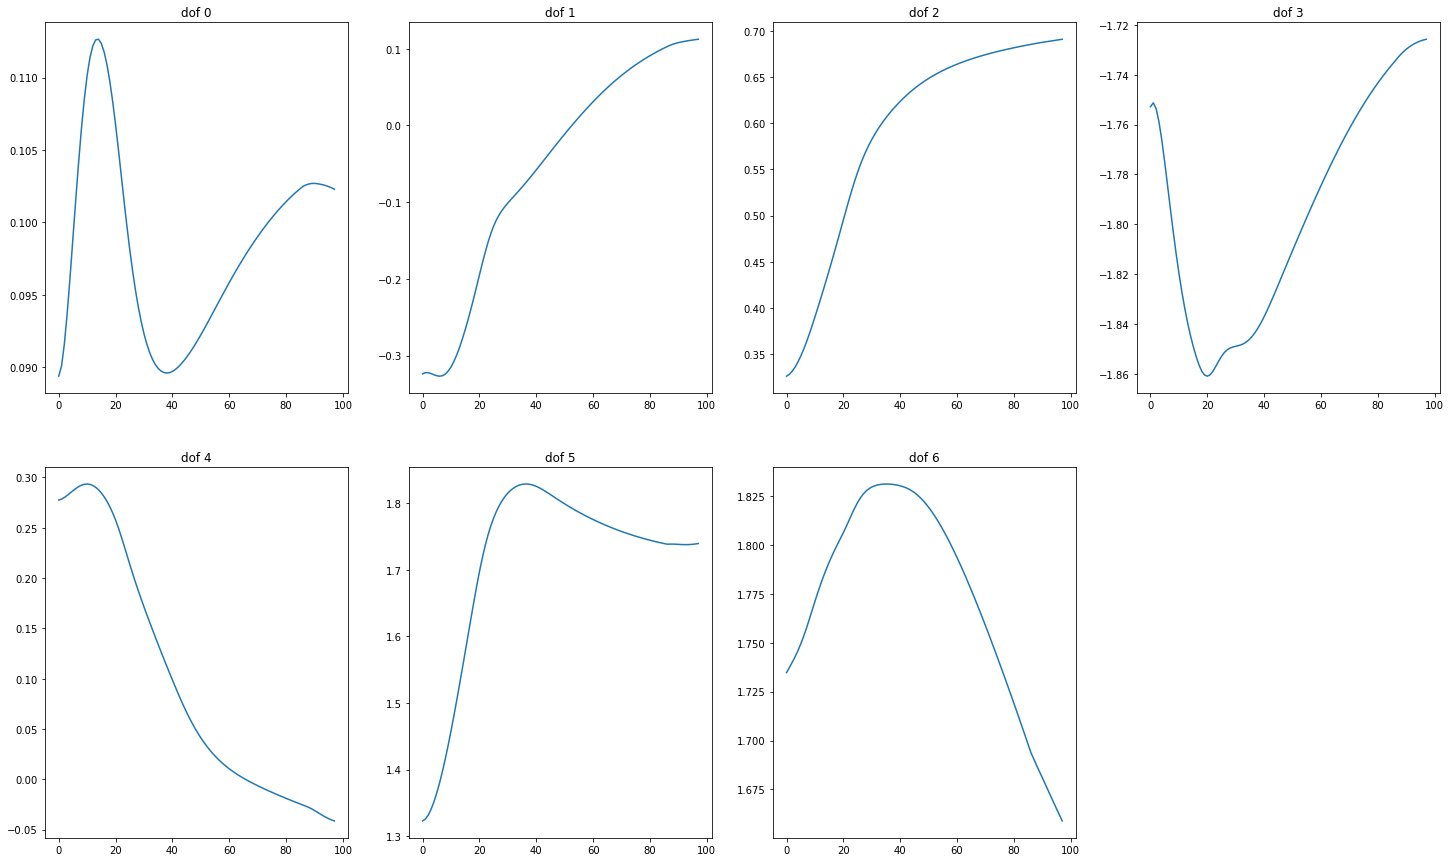

In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np

root_path='./extract_info/'
file_name= 'dof_state_pick.txt'
file_path= os.path.join(root_path, file_name)
# with open (file_path) as f:
#     lines=f.readlines()
#     q0= [line.split()[0] for line in lines]
data=np.loadtxt(file_path)
end=98 # avoid extrem values
# q0=data[:end,0]
idx=np.arange(0, end)
# plt.plot(idx,q0)
plt.figure(figsize=(25,15))
for i in range(7):
    q=data[:end,i]
    plt.subplot(2,4,i+1)
    plt.plot(idx,q)
    plt.title(f'dof {i}')
plt.show()

## MID POS CARTESIAN SPACE

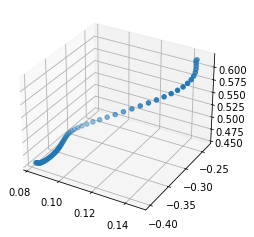

In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np

root_path='./extract_info/'
file_name= 'mid_pos_pick.txt'
file_path= os.path.join(root_path, file_name)
data=np.loadtxt(file_path)
end=98 # avoid extrem values
ax = plt.figure().add_subplot(projection='3d')
pos_x=data[:end,0]
pos_y=data[:end,1]
pos_z=data[:end,2]
ax.scatter(pos_x,pos_y, pos_z)
plt.show()